# Heart Attack Analysis & Prediction Dataset
## Данные для анализа и прогнозирования сердечного приступа

Источник: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

### Переменные(все данные являются целыми числами int)


1. Age : возраст пациента
2. Sex : пол пациента (1, если женщина, 0, если мужчина)
3. exng: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
4. caa: количество крупных сосудов (0-3)
5. cp: боль в груди (1-типичная стенокардия, 2-нетипичная стенокардия, 3-не стенокардия, то есть не боль в горле, 4 - бессимптомно)
6. trtbps: кровяное давление в состоянии покоя (в мм рт.ст)
7. chol : уровень холестерина в мг /дл 
8. fbs : уровень сахара в крови натощак > 120 мг/дл (1 = true; 0 = false)
9. restecg : результаты электрокардиографии в состоянии покоя (0-норма, 1 - наличие аномалии зубца ST-T, 2- наличие вероятной или определенной гипертрофии левого желудочка по критериям Эстеса)
10. thalachh: максимальная частота сердечных сокращений
11. output: прогноз (0 = меньше шансов на сердечный приступ, 1 = больше шансов на сердечный приступ)


In [1]:
import pandas as pd
data = pd.read_csv('heart.csv')
import numpy as np

In [3]:
data


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Удалим колонки oldpeak, thall и slp, их описание не дано подробно, предполагаем, что это связано с показателями ЭКГ. 

In [7]:
del data['thall']

In [8]:
del data['oldpeak']
del data['slp']

Рассмотрим количество людей, которым прогнозируют и не прогнозируют сердечный приступ

In [5]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

# Фильтрация

Гипотеза 1: из 165 человек, которым прогнозируют приступ, бОльшая часть - старше 50 лет. Гипотеза подтвердилась. 

In [10]:
data[(data['output'] == 1) & (data['age'] >= 50)].shape

103

Гипотеза 2: сердечным приступам больше предрасположены мужчины, поэтому их данных в датасете должно быть больше, так как они чаще проверяются в больницах по этому поводу. (Гипотеза не подтвердилась, мужчин меньше, 96 из 303)

In [38]:
data['chol'].max() - data['chol'].min()

438

Гипотеза 3: из 165 человек, которым прогнозируют приступ, 30% будут иметь либо высокий сахар в крови, либо нетипичную(или нестабильную) стенокардию, которая является серьезным признаком сердечного приступа. Посмотрим, у скольких людей в таблице есть такие показатели. (Гипотеза не подтвердилась)

In [11]:
data[((data['fbs'] == 1) | (data['cp'] == 2)) & (data['output'] == 1)].shape

(78, 11)

Гипотеза 4: у людей, которым не прогнозируют приступ, либо нормальное давление (от 110 до 130), либо нет стенокардии(exng = 0). Гипотеза подтвердилась (100 человек из 138)

In [33]:
data[(data['output'] == 0) 
& ((data['exng'] == 0)
|((data['trtbps'] >= 110)
&(data['trtbps'] <= 130)))]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
166,67,1,0,120,229,0,0,129,1,2,0
167,62,0,0,140,268,0,0,160,0,2,0
168,63,1,0,130,254,0,0,147,0,1,0
170,56,1,2,130,256,1,0,142,1,1,0
171,48,1,1,110,229,0,1,168,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,2,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


Гипотеза 5: наличие крупных сосудов - показатель меньших шансов на сердечный приступ. Гипотеза подтвердилась(93 из 138 человек)

In [15]:
data[(data['caa'] >= 1) & (data['output'] == 0)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
165,67,1,0,160,286,0,0,108,1,3,0
166,67,1,0,120,229,0,0,129,1,2,0
167,62,0,0,140,268,0,0,160,0,2,0
168,63,1,0,130,254,0,0,147,0,1,0
170,56,1,2,130,256,1,0,142,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,2,0
297,59,1,0,164,176,1,0,90,0,2,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


# Сортировка

In [18]:
data.sort_values(by = 'age')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
72,29,1,1,130,204,0,0,202,0,0,1
58,34,1,3,118,182,0,0,174,0,0,1
125,34,0,1,118,210,0,1,192,0,0,1
239,35,1,0,126,282,0,0,156,1,0,0
65,35,0,0,138,183,0,1,182,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
60,71,0,2,110,265,1,0,130,0,1,1
151,71,0,0,112,149,0,1,125,0,0,1
129,74,0,1,120,269,0,0,121,1,1,1
144,76,0,2,140,197,0,2,116,0,0,1


Самому молодому пациенту, который проверялся в больнице, 29 лет. При этом у него высокий шанс на возникновние сердечного приступа

In [30]:
data.sort_values(by = ['output', 'thalachh'])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
272,67,1,0,120,237,0,1,71,0,0,0
243,57,1,0,152,274,0,1,88,1,1,0
297,59,1,0,164,176,1,0,90,0,2,0
262,53,1,0,123,282,0,1,95,1,2,0
233,64,1,0,120,246,0,0,96,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32,44,1,1,130,219,0,0,188,0,0,1
62,52,1,3,118,186,0,0,190,0,0,1
125,34,0,1,118,210,0,1,192,0,0,1
103,42,1,2,120,240,1,1,194,0,0,1


Сортировка показала, что человеку, с меньшими шансами на сердечный приступ и при этом с самым низким учащенным сердцебиением, 67 лет(!), и это женщина. (Учащенное сердцебиение также один из показателей возможного сердечного приступа, особенно у людей в таком возрасте). 

In [20]:
data.sort_values(by = ['output', 'chol', 'exng'], ascending = [False, False, False])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
85,67,0,2,115,564,0,0,160,0,0,1
28,65,0,2,140,417,1,0,157,0,1,1
96,62,0,0,140,394,0,0,157,0,0,1
39,65,0,2,160,360,0,0,151,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
175,40,1,0,110,167,0,0,114,1,0,0
279,61,1,0,138,166,0,0,125,1,1,0
204,62,0,0,160,164,0,0,145,0,3,0
267,49,1,2,118,149,0,0,126,0,3,0


Сортировка проводилась среди людей с высокими шансами на инсульт, по наивысшему показателю холестерина и наличию стенокардии во время физических нагрузок. Сортировка показала интересный результат: у мужчины 67 лет с самым высоким холестерином нет стенокардии во время нагрузок, хотя холестерин является показателем сидячего образа жизни, и значит во время редких нагрузок боли в груде должны быть. 

# Создание переменной

Создадим переменную, которая покажет нам риск возникновения ишемического инфаркта (или инфаркта мозга). Инфаркт мозга может возникнуть у людей, у которых есть риск получения сердечного приступа (то есть есть болезни сердца), а также высокое сердцебиение (аритмия). Это влияет на кровообращение и работу артерий, что в свою очередь может привести к инфаркту мозга.  

In [23]:
import numpy as np
data['cerebral_infarction_risk'] = np.where((data['output'] == 1) & 
                                            (data['thalachh'] >= 140), 'Risk', 'No risk')

In [21]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cerebral_infarction_risk
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Risk
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Risk
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Risk
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Risk
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,No risk
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,No risk
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,No risk
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,No risk


In [7]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output,endocrinological_examination
0,63,1,3,145,233,1,0,150,0,0,1,Need
1,37,1,2,130,250,0,1,187,0,0,1,No need
2,41,0,1,130,204,0,0,172,0,0,1,No need
3,56,1,1,120,236,0,1,178,0,0,1,No need
4,57,0,0,120,354,0,1,163,1,0,1,No need
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0,No need
299,45,1,3,110,264,0,1,132,0,0,0,No need
300,68,1,0,144,193,1,1,141,0,2,0,Need
301,57,1,0,130,131,0,1,115,1,1,0,No need


##  Частотные таблицы 

<AxesSubplot:>

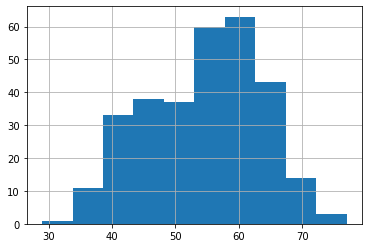

In [30]:
data['age'].hist()

Гистограмма показывает частотное распределение возрастов пациентов. Так, мы можем заметить, что чаще всего в данных встречается возраст примерно с 55 до 62 лет, а реже всего - с 29(по сортировке самому молодому пациенту 29 лет) и до примерно 35-37 лет. 

<AxesSubplot:>

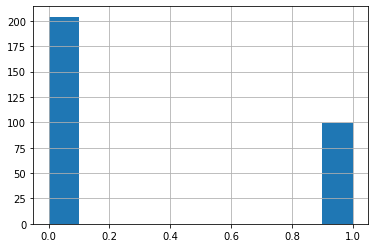

In [34]:
data['exng'].hist()

Гистограмма рассматривает информацию о стенокардии среди пациентов. Интересно, что стенокардии нет у 200 человек (стоит 0), при этом среди этих 200 человек какой-то части прогнозируют приступ(раннее мы узнали, что прогнозируют приступ 165 людям, а 138 пока ещё это не грозит). Такое распределение доказывает, что даже при отсутствии стенокардии у людей может случиться приступ, хотя стенокардия и является одним из серьезных факторов, провоцирующих приступы. 

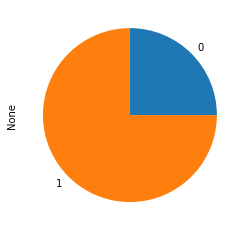

In [24]:
man_filter = data[data['sex'] == 0]
output_plot = man_filter.groupby('output').size().plot(kind='pie')


In [26]:
data[data['sex']==0]['output'].value_counts()

1    72
0    24
Name: output, dtype: int64

Круговая диаграмма построена на отфильтрованных данных (а именно информацию о мужчинах) и рассматривает распределение мужчин по возможному риску получения сердечного приступа. Таким образом, превалирующей части мужчин-пациентов прогнозируют сердеченый приступ. 

# Этап 3

## МЦТ

### Возраст 

In [9]:
data['age'].mean()

54.366336633663366

Средний возраст пациентов - 54 года с округлением. 

In [10]:
data['age'].median()

55.0

50% пациентов младше 55 лет. 

In [11]:
data['age'].mode()

0    58
dtype: int64

Чаще всего в данных встречается возраст 58 лет. 

### Пол

Пол является номинальной бинарной переменной, для нее мы можем рассчитать только моду и среднее арифметическое(так как у нас двоичная система, 1 и 0, соответственно, женщины и мужчины)

In [12]:
data['sex'].mode()

0    1
dtype: int64

Чаще всего в данных встречаются женщины.

In [13]:
data['sex'].mean()

0.6831683168316832

Доля женщин в данных составляет приблизительно 68%, следовательно их больше, чем мужчин. (Среднее арифметическое в данном случае считает долю единиц, то есть женщин)

###  Кровяное давление

In [14]:
data['trtbps'].mean()

131.62376237623764

Среднее кровяное давление среди пациентов составляет 131,6 мм рт.ст с округлением. 

In [15]:
data['trtbps'].median()

130.0

50% пациентов имеют давление меньше 130 мм рт.ст

In [16]:
data['trtbps'].mode()

0    120
dtype: int64

Наиболее часто в данных встречается кровяное давление в 120 мм рт.ст

Посмотрим, почему возникает такая большая разница между среднеарифметическим/медианой и модой?

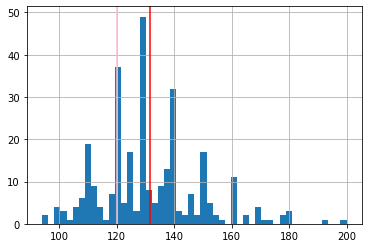

In [36]:
trtbps_mean = data['trtbps'].mean()
trtbps_mode = data['trtbps'].mode()[0]
import matplotlib.pyplot as plt
data['trtbps'].hist(bins = 50)
# Показываем на графике среднее арифметическое (красный цвет)
plt.axvline(x=trtbps_mean, color='r')
# Показываем на графике моду (розовый цвет)
plt.axvline(x=trtbps_mode, color='pink')

Гистограмма показала, что у нас несимметричное распределение, следовательно есть аномальные значения, которые как раз таки и перетягивают медиану и среднее арифметическое в большую сторону. 

### Уровень холестерина

In [24]:
data['chol'].mean()

246.26402640264027

Средний уровен холестерина среди пациентов равен 246,3 мг /дл с округлением. 

In [19]:
data['chol'].median()

240.0

У 50% пациентов уровень холестерина меньше 240 мг /дл.

In [22]:
data['chol'].mode()

0    197
1    204
2    234
dtype: int64

Переменная уровня холестерина мультимодальная, у нас 3 моды, соответственно чаще всего в данных наблюдается уровень холестерина в 197, 204 и 234 мг /дл.

###  Максимальная частота сердечных сокращений

In [26]:
data['thalachh'].mean()

149.64686468646866

Средняя максимальная частота сердечных сокращений среди пациентов составляет 149,6 с округлением.

In [28]:
data['thalachh'].median()

153.0

У 50% пациентов частота сердечных сокращений меньше 153.

In [30]:
data['thalachh'].mode()

0    162
dtype: int64

Чаще всего в данных встречается максимальная частота сердечных сокращений в 162 раза.

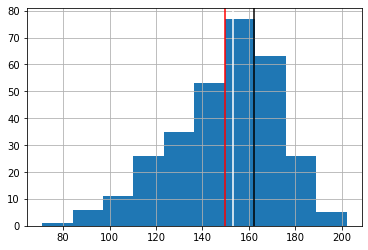

In [8]:
thalachh_mean = data['thalachh'].mean()
thalachh_median = data['thalachh'].median()
thalachh_mode = data['thalachh'].mode()[0]
import matplotlib.pyplot as plt
data['thalachh'].hist()
# Показываем на графике среднее арифметическое (красный цвет)
plt.axline((thalachh_mean, 0), (thalachh_mean, 10), color = 'red')
# Показываем на графике моду (розовый цвет)
plt.axline((thalachh_mode, 0), (thalachh_mode, 10), color = 'black')
plt.axline((thalachh_median, 0), (thalachh_median, 10), color = 'white')

Различные показатели трёх мцт заставляют вновь посмотреть гистограмму распределений. Мы видим, что распределение  несимметричное и аномальных значений достаточно, при этом они уклоняют среднее арифметическое влево, делая его меньше.  

## Выбросы

### Ящик с усами

У нас были ярко выраженные выбросы в переменных кровяного давления и максимальной частоты сердечных сокращений. Рассмотрим их с помощью ящика с усами.

<AxesSubplot:xlabel='trtbps'>

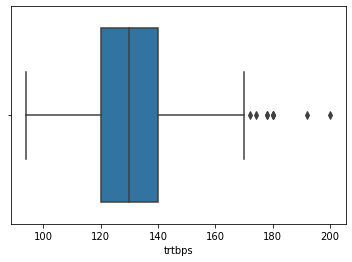

In [34]:
import seaborn as sns 
sns.boxplot(x=data['trtbps'])

В переменной кровяного давления нижняя граница значений меньше 100 (примерно 90), а верхняя - примерно 170, и выбросы (аномальные значения) есть после верхней границы, их значения составляют от 170 до 200. По этой причине, за счёт аномальных значений, которые перетягивали среднее арифметическое вправо, среднее арифметическое и было такое большое по сравнению с модой. 

<AxesSubplot:xlabel='thalachh'>

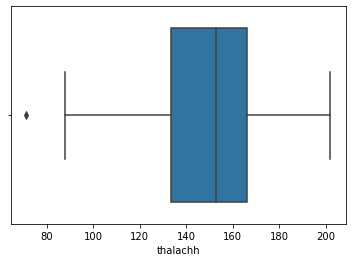

In [35]:
sns.boxplot(x=data['thalachh'])

В переменной максимальной частоты сердечных сокращений нижняя граница составляет примерно 90, а верхняя - 200. Выбросы находятся за нижней границей, их значения составляют примерно 70. Аномальные значения находятся слева, следовательно, они и среднее арифметическое перетягивают налево, делая его меньше. 

### Интерквартильный размах и среднеквадратичное отклонение

Рассмотрим выбросы по переменной кровяного давления (их было больше на графике) с помощью **интерквартильного размаха**

In [32]:
q1 = np.percentile(data['trtbps'], 25)
q3 = np.percentile(data['trtbps'], 75)
iqr=q3-q1
bottom_line = q1 - 1.5*iqr
upper_line = q3 + 1.5*iqr

In [34]:
data[(data['trtbps'] < bottom_line)|(data['trtbps'] > upper_line)].shape

(9, 12)

In [42]:
data[data['chol']==data['chol'].max()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output,cerebral_infarction_risk
85,67,0,2,115,564,0,0,160,0,0,1,Risk


Как и показал нам ящик с усами, выбросов за нижней границей в переменной кровяного давления нет. 

In [35]:
data[data['trtbps'] > upper_line]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output,cerebral_infarction_risk
8,52,1,2,172,199,1,1,162,0,0,1,Risk
101,59,1,3,178,270,0,0,145,0,0,1,Risk
110,64,0,0,180,325,0,1,154,1,0,1,Risk
203,68,1,2,180,274,1,0,150,1,0,0,No risk
223,56,0,0,200,288,1,0,133,1,2,0,No risk
241,59,0,0,174,249,0,1,143,1,0,0,No risk
248,54,1,1,192,283,0,0,195,0,1,0,No risk
260,66,0,0,178,228,1,1,165,1,2,0,No risk
266,55,0,0,180,327,0,2,117,1,0,0,No risk


Обратная ситуация с выбросами после верхней границы, всего 9 выбросов, максимальное аномальное значение равно 200. 

Рассмотрим выбросы по переменной кровяного давления (их было больше на графике) с помощью **среднеквадратичного отклонения от среднего**

In [36]:
mean = data['trtbps'].mean()
std = data['trtbps'].std(ddof=0)
bottomline = mean - 2.5*std
upperline = mean + 2.5*std
print(bottomline, upperline)

87.85081721190167 175.3967075405736


In [37]:
data[(data['trtbps'] < bottomline)|(data['trtbps'] > upperline)].shape

(7, 12)

Мы видим, что границы, высчитанные уже по среднеквадратичному отклонению, передвинулись по сравнению со значениями, полученными с помощью интерквартильного размаха. Нижняя граница стала меньше (не 90, а примерно 88), а верхняя, наоборот, стала больше (не 170, а примерно 175).

In [64]:
data[data['trtbps'] < bottomline ].value_counts('trtbps')

Series([], dtype: int64)

Как и при подсчёте с интерквартильным размахом, выбросов за нижней границей нет. 

In [29]:
data[data['trtbps'] > upperline]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output,cerebral_infarction_risk
101,59,1,3,178,270,0,0,145,0,0,1,Risk
110,64,0,0,180,325,0,1,154,1,0,1,Risk
203,68,1,2,180,274,1,0,150,1,0,0,No risk
223,56,0,0,200,288,1,0,133,1,2,0,No risk
248,54,1,1,192,283,0,0,195,0,1,0,No risk
260,66,0,0,178,228,1,1,165,1,2,0,No risk
266,55,0,0,180,327,0,2,117,1,0,0,No risk


Отличия подсчетов с интерквартильным размахом и среднеквадратичным отклонением видны при работе с верхней границей. За счёт того, что она передвинулась вправо, 2 значения (а именно 172 и 174) перестали быть выбросами, выбросов стало всего 7. 

Таким образом, можно сказать, что разница между показателями размаха и отклонения связаны с тем, как мы выстраиваем границы, с определенным коэффициентом (например, у размаха 1.5, а у отклонения 2.5, хотя могут быть другие) границы смещаются в ту или иную сторону.

## Замена выбросов

Выбросов не так много, поэтому заменим их на медиану и рассмотрим изменения в МЦТ. 

In [107]:
median = data['trtbps'].median()
data['trtbps_median'] = data['trtbps'].apply(lambda x: median if x>upper_line else x)

In [108]:
data['trtbps_median'].median()

130.0

In [109]:
data['trtbps_median'].mean()

130.0924092409241

In [110]:
data['trtbps_median'].mode()

0    130.0
dtype: float64

С заменой выбросов на медиану все три МЦТ стали одинаковыми, следовательно, распределение стало симметричным.  

## Пропущенные значения 

In [30]:
data.isna()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output,cerebral_infarction_risk
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False


Пропущенных значений нет ни в одной из колонок. 